
--- Fold 1 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.4825 | Precision: 0.4734 | Recall: 0.4825
              precision    recall  f1-score   support

           0     0.5079    0.6400    0.5664       100
           1     0.3333    0.2800    0.3043       100
           2     0.4222    0.3800    0.4000       100
           3     0.6300    0.6300    0.6300       100

    accuracy                         0.4825       400
   macro avg     0.4734    0.4825    0.4752       400
weighted avg     0.4734    0.4825    0.4752       400



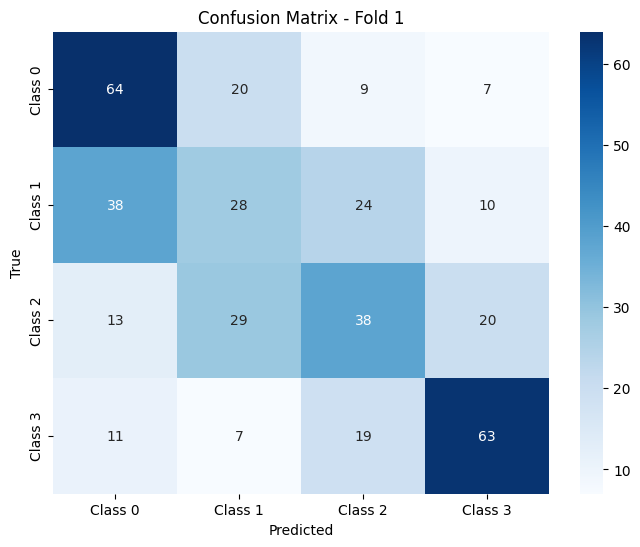


--- Fold 2 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.4425 | Precision: 0.4494 | Recall: 0.4425
              precision    recall  f1-score   support

           0     0.6047    0.5200    0.5591       100
           1     0.3371    0.3000    0.3175       100
           2     0.3277    0.3900    0.3562       100
           3     0.5283    0.5600    0.5437       100

    accuracy                         0.4425       400
   macro avg     0.4494    0.4425    0.4441       400
weighted avg     0.4494    0.4425    0.4441       400



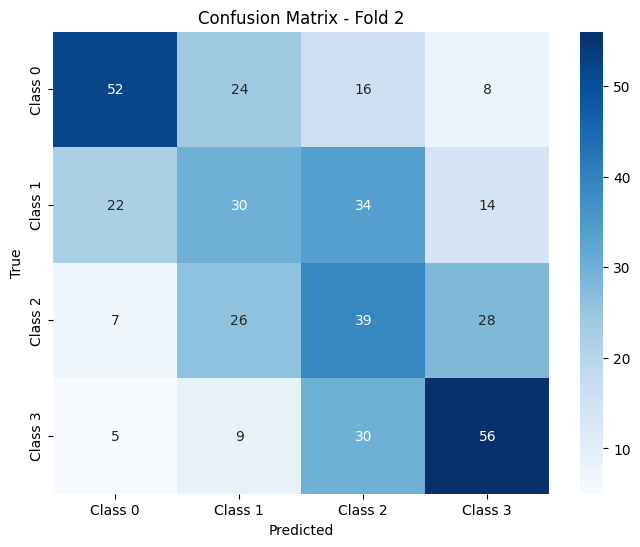


--- Fold 3 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.4950 | Precision: 0.4982 | Recall: 0.4950
              precision    recall  f1-score   support

           0     0.5714    0.5600    0.5657       100
           1     0.4595    0.1700    0.2482       100
           2     0.3750    0.5400    0.4426       100
           3     0.5868    0.7100    0.6425       100

    accuracy                         0.4950       400
   macro avg     0.4982    0.4950    0.4747       400
weighted avg     0.4982    0.4950    0.4747       400



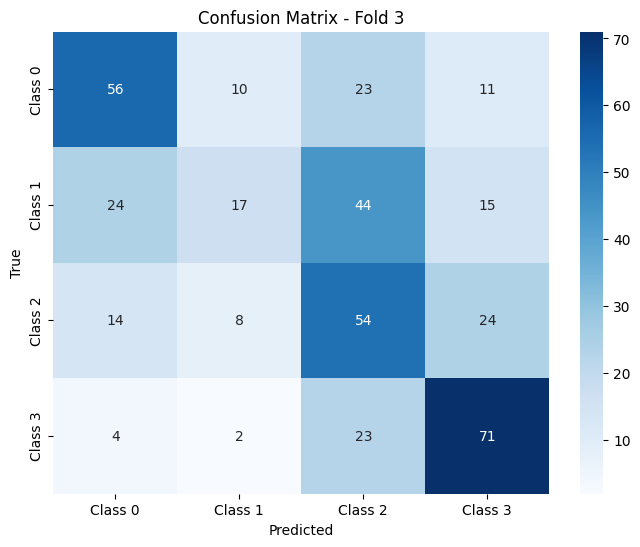


--- Fold 4 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.4325 | Precision: 0.4438 | Recall: 0.4325
              precision    recall  f1-score   support

           0     0.4921    0.6200    0.5487       100
           1     0.3800    0.1900    0.2533       100
           2     0.3243    0.4800    0.3871       100
           3     0.5789    0.4400    0.5000       100

    accuracy                         0.4325       400
   macro avg     0.4438    0.4325    0.4223       400
weighted avg     0.4438    0.4325    0.4223       400



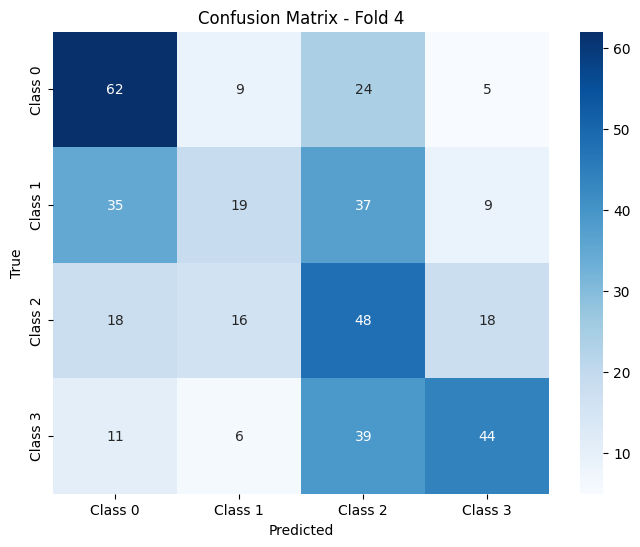


--- Fold 5 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.4525 | Precision: 0.4441 | Recall: 0.4525
              precision    recall  f1-score   support

           0     0.5039    0.6400    0.5639       100
           1     0.3478    0.1600    0.2192       100
           2     0.3609    0.4800    0.4120       100
           3     0.5638    0.5300    0.5464       100

    accuracy                         0.4525       400
   macro avg     0.4441    0.4525    0.4354       400
weighted avg     0.4441    0.4525    0.4354       400



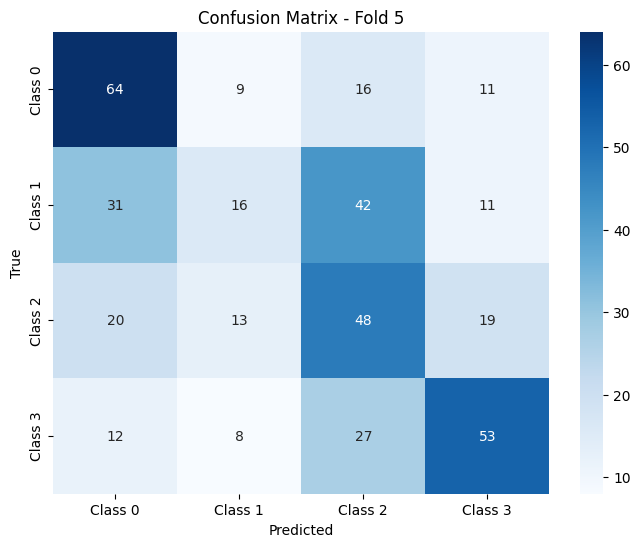


--- Cross-Validation Results (5-Fold) ---
Mean Accuracy: 0.4610 ± 0.0239
Mean Precision (macro): 0.4618 ± 0.0212
Mean Recall (macro): 0.4610 ± 0.0239


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session

df = pd.read_csv("train.csv")
X = df.drop(columns=["price_range"]).values
y = df["price_range"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))
y_cat = to_categorical(y)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []

fold = 1
for train_idx, test_idx in kfold.split(X_scaled, y):
    print(f"\n--- Fold {fold} ---")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]
    y_true = y[test_idx]

    clear_session()

    model = Sequential([
        Conv1D(128, kernel_size=5, activation='relu', input_shape=(X_scaled.shape[1], 1)),
        BatchNormalization(),
        Dropout(0.3),
        
        Conv1D(64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Conv1D(32, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Conv1D(16, kernel_size=3, activation='relu'),  
        BatchNormalization(),
        Dropout(0.3),

        GlobalMaxPooling1D(),

        Dense(128, activation='relu'),  
        Dropout(0.4),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)

    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')

    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")
    print(classification_report(y_true, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    fold += 1

print("\n--- Cross-Validation Results (5-Fold) ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Mean Precision (macro): {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
print(f"Mean Recall (macro): {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
